# FeedForward Network for MNIST Dataset

In [24]:
import tensorflow as tf

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout,BatchNormalization,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
from sklearn.metrics import classification_report

In [27]:
train_images = pd.read_csv('/Users/saifuddinshaikh/Downloads/LP-IV-datasets/MNIST(Ass2&3)/mnist_train.csv')
test_images = pd.read_csv('/Users/saifuddinshaikh/Downloads/LP-IV-datasets/MNIST(Ass2&3)/mnist_test.csv')

In [48]:
X_train = train_images.drop('label',axis=1).values
y_train = train_images['label'].values
X_test = test_images.drop('label',axis=1).values
y_test = test_images['label'].values

In [49]:
print(X_train.shape)

(60000, 784)


In [50]:
X_train = X_train.reshape(60000,28,28)
X_test = X_test.reshape(10000,28,28)

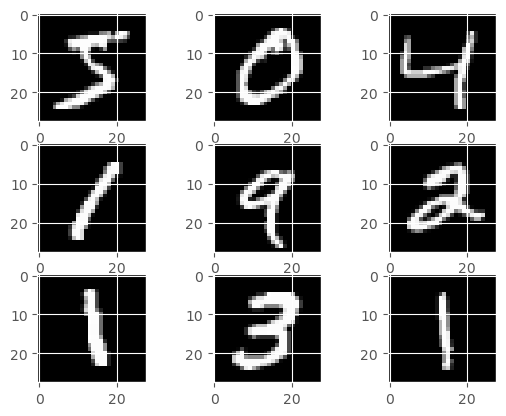

In [51]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i],'gray')

In [52]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [53]:
#building the model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dropout_2 (Dropout)         (None, 784)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                      

In [55]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='Adam',metrics=["accuracy"])
H = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=11, batch_size=64,verbose=1)

Epoch 1/11
938/938 [==============================] - 2s 2ms/step - loss: 0.2949 - accuracy: 0.9087 - val_loss: 0.1306 - val_accuracy: 0.9617
Epoch 2/11
938/938 [==============================] - 2s 2ms/step - loss: 0.1412 - accuracy: 0.9560 - val_loss: 0.1061 - val_accuracy: 0.9693
Epoch 3/11
938/938 [==============================] - 2s 2ms/step - loss: 0.1094 - accuracy: 0.9651 - val_loss: 0.0961 - val_accuracy: 0.9724
Epoch 4/11
938/938 [==============================] - 2s 2ms/step - loss: 0.0923 - accuracy: 0.9708 - val_loss: 0.0938 - val_accuracy: 0.9736
Epoch 5/11
938/938 [==============================] - 2s 2ms/step - loss: 0.0827 - accuracy: 0.9727 - val_loss: 0.0876 - val_accuracy: 0.9747
Epoch 6/11
938/938 [==============================] - 2s 2ms/step - loss: 0.0727 - accuracy: 0.9765 - val_loss: 0.0921 - val_accuracy: 0.9751
Epoch 7/11
938/938 [==============================] - 2s 2ms/step - loss: 0.0673 - accuracy: 0.9780 - val_loss: 0.0824 - val_accuracy: 0.9788
Epoch 

In [59]:
score = model.evaluate(X_test,y_test)
accuracy = score[1] * 100 
print(f'Test Accuracy: {accuracy:.2f}%')

313/313 [==============================] - 0s 680us/step - loss: 0.0827 - accuracy: 0.9783
Test Accuracy: 97.83%


## Plotting Accuracy and Loss graphs vs epochs

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/j5/nhxv5w8x0gzd60g69wvd3x_m0000gn/T/ipykernel_97437/2774643619.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


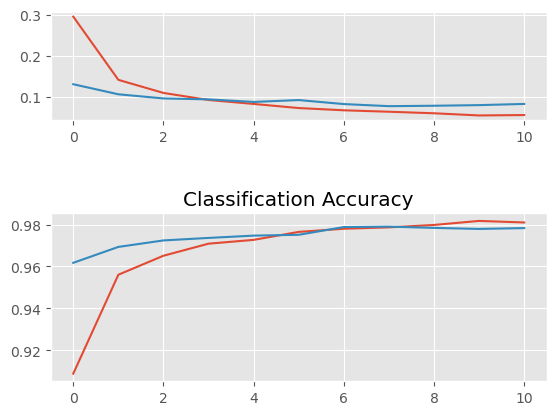

In [60]:
plt.style.use('ggplot')
plt.figure()
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.title("Cross Entropy Loss")
plt.subplot(3,1,1)
plt.plot(H.history["loss"], label="train_loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.subplot(2,1,2)
plt.title("Classification Accuracy")
plt.plot(H.history["accuracy"], label="train_accuracy")
plt.plot(H.history["val_accuracy"], label="val_accuracy")

In [62]:
#making the predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(y_test,predictions.argmax(axis=1),target_names=[str(x) for x in range(10)]))

79/79 [==============================] - 0s 992us/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# CNN architecture for MNIST dataset

In [197]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [198]:
train_x = train_images
train_y = train_labels
test_x = test_images
test_y = test_labels

In [199]:
train_x = train_x.astype("float32") / 255.0
test_x = test_x.astype("float32") / 255.0

In [200]:
train_x.shape

(60000, 28, 28)

In [202]:
cnn = Sequential()

cnn.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.1))
cnn.add(BatchNormalization())

cnn.add(Conv2D(filters=64,kernel_size=(3,3),padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.1))
cnn.add(BatchNormalization())

cnn.add(Conv2D(filters=128,kernel_size=(3,3),padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.1))
cnn.add(BatchNormalization())

cnn.add(Flatten())
cnn.add(Dropout(0.1))

cnn.add(Dense(units=512, activation="relu"))
cnn.add(Dropout(0.1))
cnn.add(BatchNormalization())

cnn.add(Dense(units=10, activation="softmax"))

In [204]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [205]:
history = cnn.fit(train_x, train_y, validation_data = (test_x,test_y), epochs=20, batch_size=64)

Epoch 1/20
938/938 [==============================] - 34s 36ms/step - loss: 0.1330 - accuracy: 0.9589 - val_loss: 0.0392 - val_accuracy: 0.9859
Epoch 2/20
938/938 [==============================] - 34s 37ms/step - loss: 0.0516 - accuracy: 0.9840 - val_loss: 0.0330 - val_accuracy: 0.9884
Epoch 3/20
938/938 [==============================] - 37s 39ms/step - loss: 0.0402 - accuracy: 0.9866 - val_loss: 0.0290 - val_accuracy: 0.9911
Epoch 4/20
938/938 [==============================] - 38s 41ms/step - loss: 0.0338 - accuracy: 0.9894 - val_loss: 0.0346 - val_accuracy: 0.9889
Epoch 5/20
938/938 [==============================] - 39s 41ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.0415 - val_accuracy: 0.9862
Epoch 6/20
938/938 [==============================] - 40s 43ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0253 - val_accuracy: 0.9918
Epoch 7/20
938/938 [==============================] - 40s 42ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0322 - val_accuracy:

KeyboardInterrupt: 

In [207]:
score1 = cnn.evaluate(test_x,test_y)
accuracy1 = score1[1]*100
print(f'Accuracy of the model is: {accuracy1:.2f}%')

313/313 [==============================] - 2s 7ms/step - loss: 0.0243 - accuracy: 0.9930
Accuracy of the model is: 99.30%


In [208]:
predictions1 = cnn.predict(test_x)

313/313 [==============================] - 2s 7ms/step


9


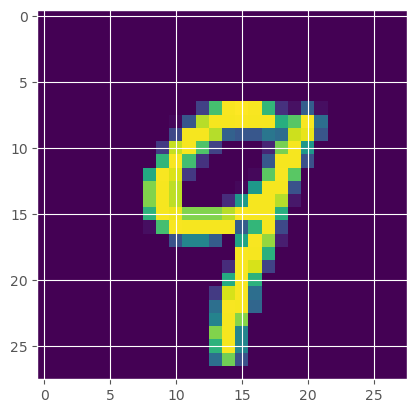

In [212]:
plt.imshow(test_x[12])
print(predictions1.argmax(axis=1)[12])